In [1]:
# ===============================
# Data manipulation and analysis
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ===============================
# Data visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Model building and evaluation
# ===============================
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)

# ===============================
# Serialization and typing
# ===============================
import joblib
from typing import List, Optional, Tuple


In [2]:
import pandas as pd
from typing import Optional, Dict, Any

# The Data class provides a structured way to handle and analyze data stored in a pandas DataFrame.
# It includes methods for loading data from a CSV file, viewing data, and performing various statistical analyses.

class Data:
    def __init__(self):
        """Initialize the Data object with an empty DataFrame."""
        self.df: Optional[pd.DataFrame] = None  # DataFrame to hold the loaded data, initially set to None.

    def load_data(self, path: str) -> bool:
        """
        Load data from a CSV file.

        Parameters:
            path (str): The file path to the CSV file to be loaded.

        Returns:
            bool: True if data is loaded successfully, False otherwise.
        """
        try:
            self.df = pd.read_csv(path)  # Load the CSV file into the DataFrame.
            print("✅ Data loaded successfully.")
            return True  # Return True if loading is successful.
        except Exception as e:
            print(f"❌ Failed to load data: {e}")  # Print error message if loading fails.
            return False  # Return False if loading fails.

    def _validate_df(self) -> bool:
        """
        Check if the DataFrame is loaded.

        Returns:
            bool: True if the DataFrame is loaded, False otherwise.
        """
        if self.df is None:  # Check if the DataFrame is None (not loaded).
            print("❌ No data loaded. Please load data first.")  # Print error message if not loaded.
            return False  # Return False if DataFrame is not loaded.
        return True  # Return True if DataFrame is loaded.

    def head(self, n: int = 5) -> Optional[pd.DataFrame]:
        """
        Return the first n rows of the DataFrame.

        Parameters:
            n (int): The number of rows to return (default is 5).

        Returns:
            Optional[pd.DataFrame]: The first n rows of the DataFrame, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            return self.df.head(n)  # Return the first n rows.

    def tail(self, n: int = 5) -> Optional[pd.DataFrame]:
        """
        Return the last n rows of the DataFrame.

        Parameters:
            n (int): The number of rows to return (default is 5).

        Returns:
            Optional[pd.DataFrame]: The last n rows of the DataFrame, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            return self.df.tail(n)  # Return the last n rows.

    def shape(self) -> Optional[tuple]:
        """
        Return the shape of the DataFrame.

        Returns:
            Optional[tuple]: A tuple containing the number of rows and columns, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            rows, cols = self.df.shape  # Get the shape of the DataFrame.
            print(f"✅ Dataset contains {rows:,} rows and {cols} columns.")  # Print the shape.
            return (rows, cols)  # Return the shape as a tuple.

    def info(self) -> None:
        """
        Print information about the DataFrame.

        Returns:
            None
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            print("✅ Dataset Info:")  # Print header for dataset info.
            return self.df.info()  # Print the DataFrame info.

    def describe(self) -> Optional[pd.DataFrame]:
        """
        Return summary statistics of the DataFrame.

        Returns:
            Optional[pd.DataFrame]: Summary statistics of the DataFrame, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            print("✅ Summary statistics:")  # Print header for summary statistics.
            return self.df.describe()  # Return summary statistics.

    def check_missing_values(self) -> Optional[pd.Series]:
        """
        Return missing values per column.

        Returns:
            Optional[pd.Series]: A Series with the count of missing values per column, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            print("✅ Missing values per column:")  # Print header for missing values.
            return self.df.isnull().sum()  # Return the count of missing values per column.

    def value_counts(self, column: str) -> Optional[pd.Series]:
        """
        Return value counts for a specific column.

        Parameters:
            column (str): The name of the column for which to return value counts.

        Returns:
            Optional[pd.Series]: A Series with value counts for the specified column, or None if DataFrame is not loaded or column is not found.
        """
        if self._validate_df() and column in self.df.columns:  # Validate if DataFrame is loaded and column exists.
            print(f"✅ Value counts for '{column}':")  # Print header for value counts.
            return self.df[column].value_counts()  # Return value counts for the specified column.
        else:
            print(f"❌ Column '{column}' not found.")  # Print error message if column is not found.
            return None  # Return None if column is not found.

    def correlation_matrix(self) -> Optional[pd.DataFrame]:
        """
        Return the correlation matrix of the DataFrame.

        Returns:
            Optional[pd.DataFrame]: The correlation matrix, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            print("✅ Correlation matrix:")  # Print header for correlation matrix.
            return self.df.corr(numeric_only=True)  # Return the correlation matrix.

    def unique_values(self) -> Optional[Dict[str, int]]:
        """
        Return unique values per column.

        Returns:
            Optional[Dict[str, int]]: A dictionary with column names as keys and the count of unique values as values, or None if DataFrame is not loaded.
        """
        if self._validate_df():  # Validate if DataFrame is loaded.
            print("✅ Unique values per column:")  # Print header for unique values.
            return {col: self.df[col].nunique() for col in self.df.columns}  # Return a dictionary of unique values per column.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# The DataPreprocessing class is designed to clean and preprocess a pandas DataFrame.
# It includes methods for cleaning column names, converting data types, handling null values,
# removing duplicates, encoding categorical features, and scaling numeric features.

class DataPreprocessing:
    def __init__(self, dataframe: pd.DataFrame):
        """
        Initialize the DataPreprocessing object with a DataFrame.

        Parameters:
            dataframe (pd.DataFrame): The DataFrame to be preprocessed.
        """
        self.df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original.

    def clean_data(self) -> None:
        """
        Clean the DataFrame by stripping column names and replacing spaces with underscores.

        Returns:
            None
        """
        # Strip column names, replace spaces with underscores
        self.df.columns = [col.strip().replace(" ", "_") for col in self.df.columns]
        print("✅ Column names cleaned.")

    def convert_datatype(self) -> None:
        """
        Convert specified columns to numeric data types.

        Returns:
            None
        """
        # Force correct types if needed (most will be numeric already)
        numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
        for col in numeric_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
        print("✅ Data types converted.")

    def remove_null_values(self, strategy: str = 'mean') -> None:
        """
        Handle null values in specific columns by replacing zero values with NaN and filling NaNs.

        Parameters:
            strategy (str): The strategy to handle null values ('mean', 'median', or 'drop').

        Returns:
            None
        """
        # Replace zero values in specific columns with NaN
        cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
        self.df[cols_with_zeros] = self.df[cols_with_zeros].replace(0, np.nan)
        
        # Fill NaNs based on the specified strategy
        for col in cols_with_zeros:
            if strategy == 'mean':
                self.df[col] = self.df[col].fillna(self.df[col].mean())  # Fill NaNs with the mean
            elif strategy == 'median':
                self.df[col].fillna(self.df[col].median(), inplace=True)  # Fill NaNs with the median
            elif strategy == 'drop':
                self.df.dropna(inplace=True)  # Drop rows with NaNs
        print(f"✅ Null values handled using '{strategy}' strategy.")

    def remove_duplicates(self) -> None:
        """
        Remove duplicate rows from the DataFrame.

        Returns:
            None
        """
        before = len(self.df)  # Count rows before removing duplicates
        self.df.drop_duplicates(inplace=True)  # Remove duplicate rows
        after = len(self.df)  # Count rows after removing duplicates
        print(f"✅ Removed {before - after} duplicate rows.")

    def encode_features(self) -> None:
        """
        Encode categorical features using label encoding.

        Returns:
            None
        """
        # No categorical columns in this dataset, but example included
        label_encoders = {}  # Dictionary to hold label encoders for each categorical column
        for col in self.df.select_dtypes(include=['object']).columns:  # Select object (categorical) columns
            le = LabelEncoder()  # Create a label encoder
            self.df[col] = le.fit_transform(self.df[col])  # Fit and transform the column
            label_encoders[col] = le  # Store the encoder
        if label_encoders:
            print("✅ Categorical features encoded.")
        else:
            print("✅ No categorical features to encode.")

    def scale_features(self) -> None:
        """
        Scale numeric features using MinMaxScaler.

        Returns:
            None
        """
        scaler = MinMaxScaler()  # Create a MinMaxScaler instance
        features_to_scale = self.df.columns.drop('Outcome')  # Do not scale the target variable
        self.df[features_to_scale] = scaler.fit_transform(self.df[features_to_scale])  # Scale features
        print("✅ Numeric features scaled using MinMaxScaler.")

    def get_processed_data(self) -> pd.DataFrame:
        """
        Return the processed DataFrame.

        Returns:
            pd.DataFrame: The preprocessed DataFrame.
        """
        return self.df  # Return the processed DataFrame


In [4]:
class Graph:
    def __init__(self, dataframe: pd.DataFrame):
        """
        Initialize the Graph class with a pandas DataFrame.
        
        Parameters:
            dataframe (pd.DataFrame): Input data for visualization
        """
        self.df = dataframe.copy()  # Create a copy to avoid modifying original data
        sns.set(style="whitegrid")  # Set default seaborn style
        # --- Univariate Plots ---
    def plot_histogram(self, column: str, bins: int = 30, kde: bool = False) -> None:
        """
        Plot a histogram for a single numeric column.
        
        Parameters:
            column (str): Column name to plot
            bins (int): Number of bins for histogram (default: 30)
            kde (bool): Whether to show KDE curve (default: False)
        """
        plt.figure(figsize=(8,5))
        sns.histplot(self.df[column].dropna(), bins=bins, kde=kde)
        plt.title(f'Histogram of {column}')
        plt.show()

    def plot_boxplot(self, column: str) -> None:
        """
        Plot a boxplot for a single column.
        
        Parameters:
            column (str): Column name to plot
        """
        plt.figure(figsize=(6,4))
        sns.boxplot(x=self.df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.show()

    def plot_countplot(self, column: str) -> None:
        """
        Plot value counts for a categorical column.
        
        Parameters:
            column (str): Categorical column name
        """
        plt.figure(figsize=(6,4))
        sns.countplot(x=self.df[column])
        plt.title(f'Countplot of {column}')
        plt.show()

    def plot_kde(self, column: str) -> None:
        """
        Plot Kernel Density Estimate for a numeric column.
        
        Parameters:
            column (str): Numeric column name
        """
        plt.figure(figsize=(8,5))
        sns.kdeplot(self.df[column].dropna(), fill=True)
        plt.title(f'KDE Plot of {column}')
        plt.show()
        # --- Bivariate Plots ---
    def plot_scatter(self, x_col: str, y_col: str, hue: Optional[str] = None) -> None:
        """
        Plot a scatter plot between two columns.
        
        Parameters:
            x_col (str): X-axis column name
            y_col (str): Y-axis column name
            hue (str, optional): Column name for color encoding
        """
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=self.df, x=x_col, y=y_col, hue=hue)
        plt.title(f'Scatter Plot: {x_col} vs {y_col}')
        plt.show()

    def plot_line(self, x_col: str, y_col: str) -> None:
        """
        Plot a line plot between two columns.
        
        Parameters:
            x_col (str): X-axis column name
            y_col (str): Y-axis column name
        """
        plt.figure(figsize=(8,6))
        sns.lineplot(data=self.df, x=x_col, y=y_col)
        plt.title(f'Line Plot: {x_col} vs {y_col}')
        plt.show()

    def plot_bar(self, x_col: str, y_col: str) -> None:
        """
        Plot a bar plot between two columns.
        
        Parameters:
            x_col (str): X-axis column name (typically categorical)
            y_col (str): Y-axis column name (typically numeric)
        """
        plt.figure(figsize=(8,6))
        sns.barplot(data=self.df, x=x_col, y=y_col)
        plt.title(f'Bar Plot: {x_col} vs {y_col}')
        plt.show()

    def plot_boxplot_bivariate(self, x_col: str, y_col: str) -> None:
        """
        Plot a boxplot comparing distributions across categories.
        
        Parameters:
            x_col (str): Categorical column name
            y_col (str): Numeric column name
        """
        plt.figure(figsize=(8,6))
        sns.boxplot(data=self.df, x=x_col, y=y_col)
        plt.title(f'Boxplot: {x_col} vs {y_col}')
        plt.show()

    def plot_heatmap(self, annot: bool = True, cmap: str = "coolwarm") -> None:
        """
        Plot a correlation heatmap for numeric columns.
        
        Parameters:
            annot (bool): Whether to show correlation values (default: True)
            cmap (str): Color map to use (default: "coolwarm")
        """
        plt.figure(figsize=(10,8))
        corr = self.df.corr()
        sns.heatmap(corr, annot=annot, cmap=cmap, fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
        # --- Utility to plot multiple histograms for numeric columns ---
    def plot_all_histograms(self, columns: Optional[List[str]] = None, bins: int = 30) -> None:
        """
        Plot histograms for multiple numeric columns in a grid.
        
        Parameters:
            columns (List[str], optional): List of columns to plot (default: all numeric)
            bins (int): Number of bins for histograms (default: 30)
        """
        if columns is None:
            columns = self.df.select_dtypes(include=['number']).columns.tolist()
            
        n_cols = 3  # Number of columns in the grid
        n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate needed rows
        
        plt.figure(figsize=(5 * n_cols, 4 * n_rows))
        for i, col in enumerate(columns, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.histplot(self.df[col].dropna(), bins=bins, kde=True)
            plt.title(f'Histogram of {col}')
        plt.tight_layout()
        plt.show()

In [5]:
# 📦 Class: DataSplitter
# This class takes a pandas DataFrame and a target column name, and helps split the data
# into features (X) and labels (y), then further splits them into training and testing sets.
class DataSplitter:
    # Initializes the DataSplitter with the dataframe and target column
    def __init__(self, df: pd.DataFrame, target: str):
        # df: The entire dataset as a pandas DataFrame
        # target: The name of the column to be used as the target variable
        self.df = df.copy()
        self.target = target
        self.X = self.df.drop(columns=[self.target])  # Features
        self.y = self.df[self.target]  # Target variable

    # Splits the dataset into training and test sets
    def split(self, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        # test_size: Proportion of the dataset to include in the test split (default = 0.2 means 20%)
        # random_state: Seed for random number generator (ensures reproducibility)
        # Returns: X_train, X_test, y_train, y_test as a tuple
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state, stratify=self.y
        )
        print(f"✅ Data split into train and test sets with test size = {test_size}")
        print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
        return X_train, X_test, y_train, y_test


# 🤖 Class: SVMModel
# This class defines a Support Vector Machine (SVM) model with optional scaling.
# It includes methods to train, predict, evaluate, and save/load the model.
class SVMModel:
    # Initializes the SVM model with specified parameters
    def __init__(self, kernel: str = 'rbf', C: float = 1.0, gamma: Optional[str] = 'scale', use_scaler: bool = True):
        # kernel: Specifies the kernel type to be used in the algorithm ('linear', 'rbf', etc.)
        # C: Regularization parameter (higher value means less regularization)
        # gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'; 'scale' is default
        # use_scaler: Whether to apply MinMax scaling to the features
        self.model = SVC(kernel=kernel, C=C, gamma=gamma, class_weight='balanced')
        self.scaler = MinMaxScaler() if use_scaler else None
        self.is_trained = False  # Flag to track if model is trained

    # Trains the SVM model on the provided training data
    def train_model(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        # X_train: Training features
        # y_train: Training labels
        if self.scaler:
            X_train = self.scaler.fit_transform(X_train)  # Scale features if scaler is used
        self.model.fit(X_train, y_train)  # Train the model
        self.is_trained = True
        print("✅ Model training complete.")

    # Makes predictions using the trained model
    def predict(self, X_test: pd.DataFrame) -> Optional[pd.Series]:
        # X_test: Test features
        if not self.is_trained:
            print("❌ Model is not trained yet.")
            return None
        if self.scaler:
            X_test = self.scaler.transform(X_test)  # Scale test features if scaler was used
        return self.model.predict(X_test)  # Return predictions

    # Evaluates the model predictions using classification metrics
    def evaluate(self, y_true: pd.Series, y_pred: pd.Series) -> None:
        # y_true: Actual target values
        # y_pred: Predicted target values from the model
        print("✅ Model Evaluation:")
        print("Confusion Matrix:")
        print(confusion_matrix(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
        print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    # Saves the model and scaler (if any) to disk using joblib
    def save_model(self, filepath: str) -> None:
        # filepath: Destination file path to save the model
        joblib.dump({'model': self.model, 'scaler': self.scaler}, filepath)
        print(f"✅ Model and scaler saved to '{filepath}'")

    # Loads the model and scaler from disk using joblib
    def load_model(self, filepath: str) -> None:
        # filepath: Source file path to load the model
        data = joblib.load(filepath)
        self.model = data['model']
        self.scaler = data['scaler']
        self.is_trained = True
        print(f"✅ Model and scaler loaded from '{filepath}'")

In [6]:
# Create an object of the Data class
# This class is assumed to handle data loading and preprocessing operations
data = Data()

# Load the dataset from a CSV file
# The file path should point to the location of the dataset
data.load_data("data/PIMA_diabetes.csv")

# Display the first 10 rows of the dataset
# Helps to visually inspect the structure and values in the dataset
print(data.head(10))

# Display the shape of the dataset (number of rows and columns)
# Useful to understand the size of the dataset
data.shape()

# Display basic information about the dataset
# Includes data types, column names, and non-null counts
data.info()

# Display summary statistics for numeric columns
# Provides insights into central tendency and dispersion
print(data.describe())

# Check for missing or null values in the dataset
# Useful for identifying if any preprocessing steps are required
print(data.check_missing_values())

# Display the number of occurrences of each unique value in the 'Outcome' column
# Useful for understanding class distribution (e.g., balanced or imbalanced dataset)
print(data.value_counts("Outcome"))

# Display the correlation matrix of numerical features
# Helps to identify linear relationships between features
print(data.correlation_matrix())

# Display unique values for each column
# Useful for understanding the range or categories present in each feature
print(data.unique_values())


✅ Data loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3  

In [7]:
# Assuming the dataset is loaded into a pandas DataFrame named df
df = pd.read_csv('data/PIMA_diabetes.csv')  # Load CSV data into DataFrame

# Create an instance of DataPreprocessing class with the loaded DataFrame
preprocessor = DataPreprocessing(df)

# Clean the data (e.g., remove unwanted characters, fix formatting issues)
preprocessor.clean_data()

# Convert data types of columns to appropriate types (e.g., object to numeric)
preprocessor.convert_datatype()

# Remove or impute null/missing values in the dataset
# strategy='mean' indicates missing values will be replaced with the column mean
preprocessor.remove_null_values(strategy='mean')

# Remove duplicate rows to avoid bias or redundancy
preprocessor.remove_duplicates()

# Encode categorical features to numeric (e.g., one-hot encoding or label encoding)
preprocessor.encode_features()

# Scale numerical features to a standard range or distribution (e.g., normalization or standardization)
preprocessor.scale_features()

# Retrieve the fully processed DataFrame after all preprocessing steps
processed_df = preprocessor.get_processed_data()


✅ Column names cleaned.
✅ Data types converted.
✅ Null values handled using 'mean' strategy.
✅ Removed 0 duplicate rows.
✅ No categorical features to encode.
✅ Numeric features scaled using MinMaxScaler.


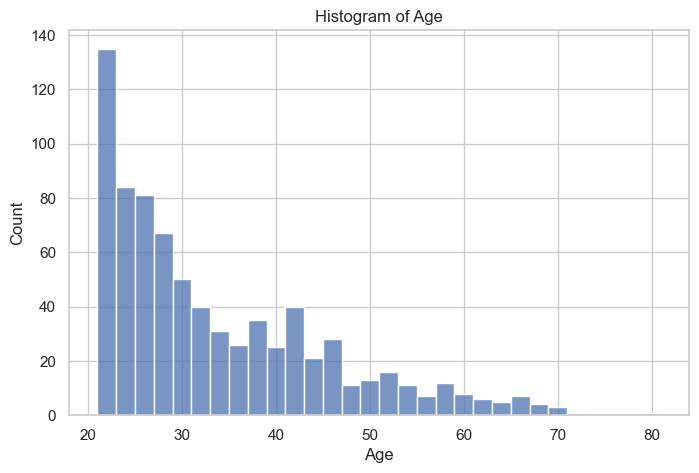

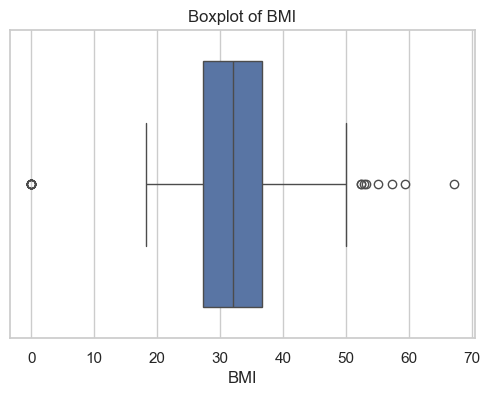

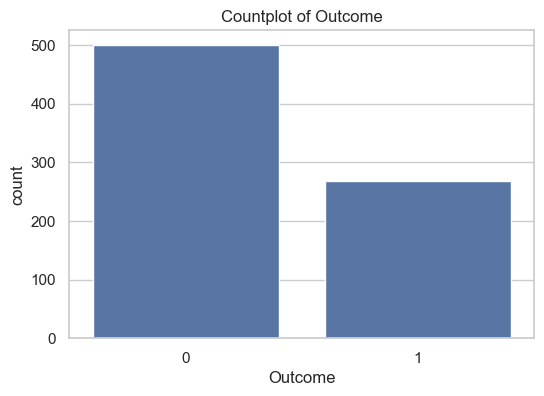

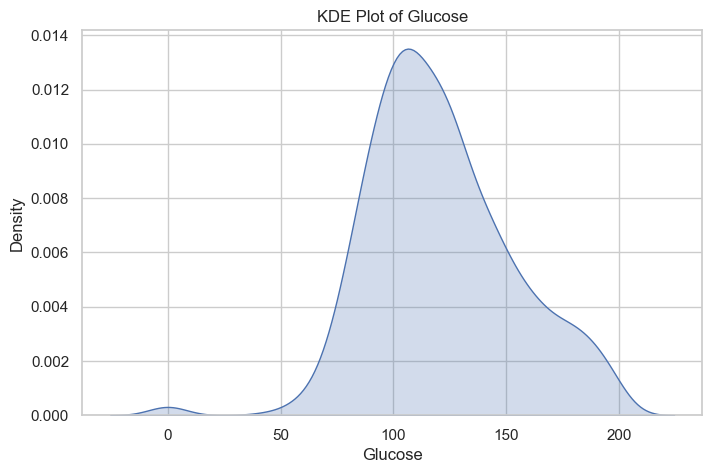

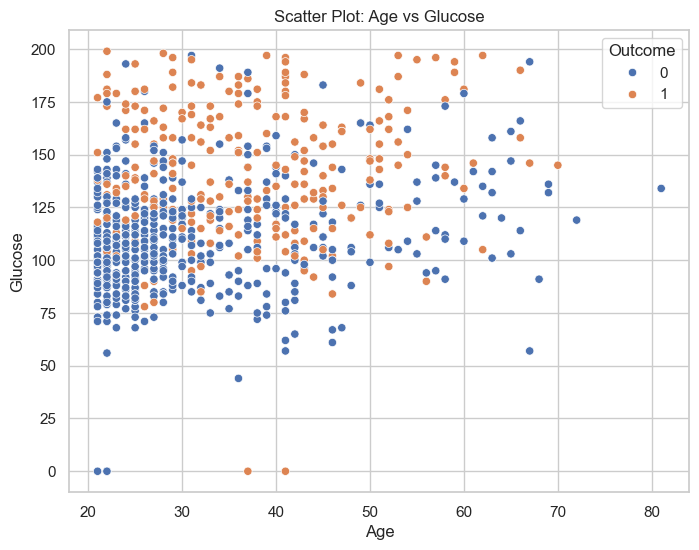

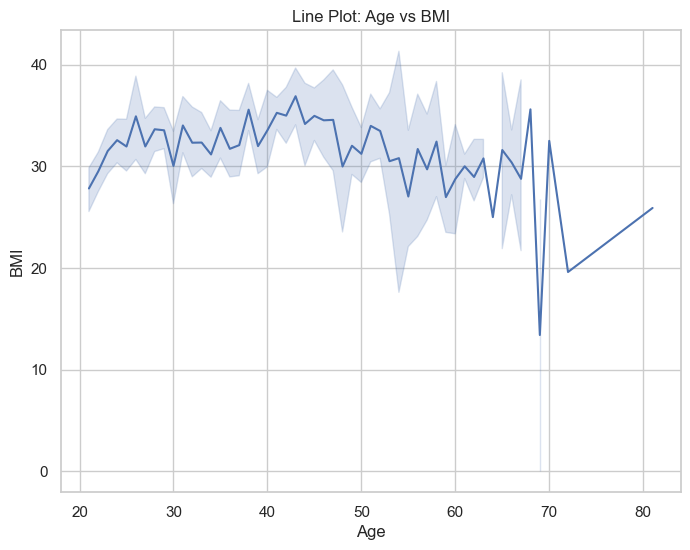

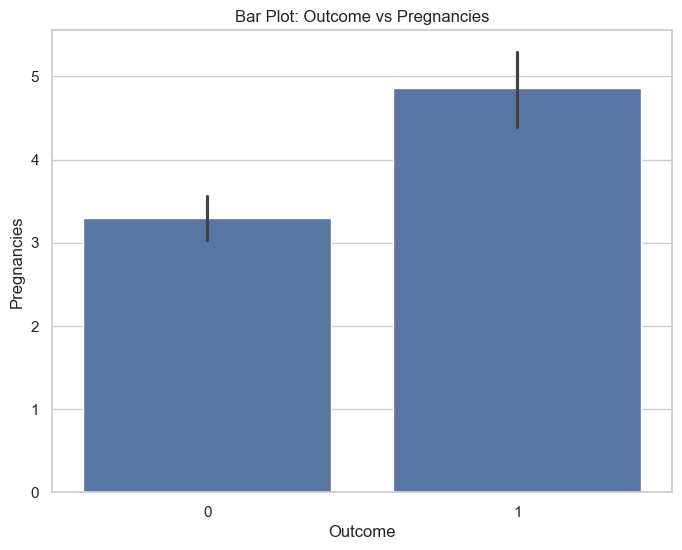

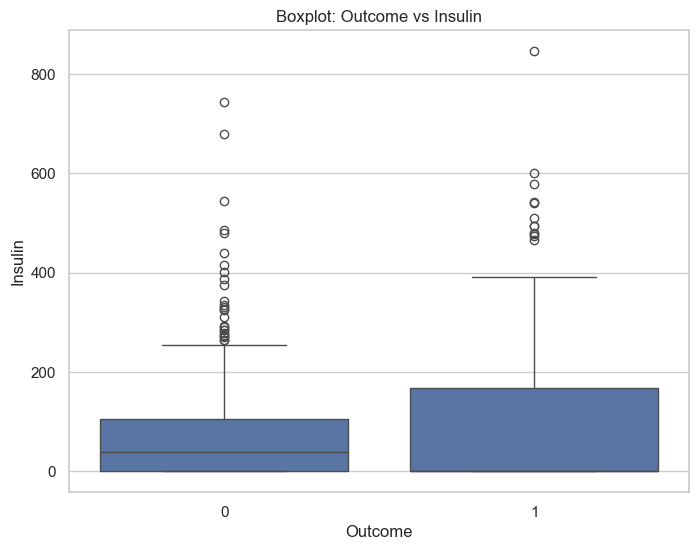

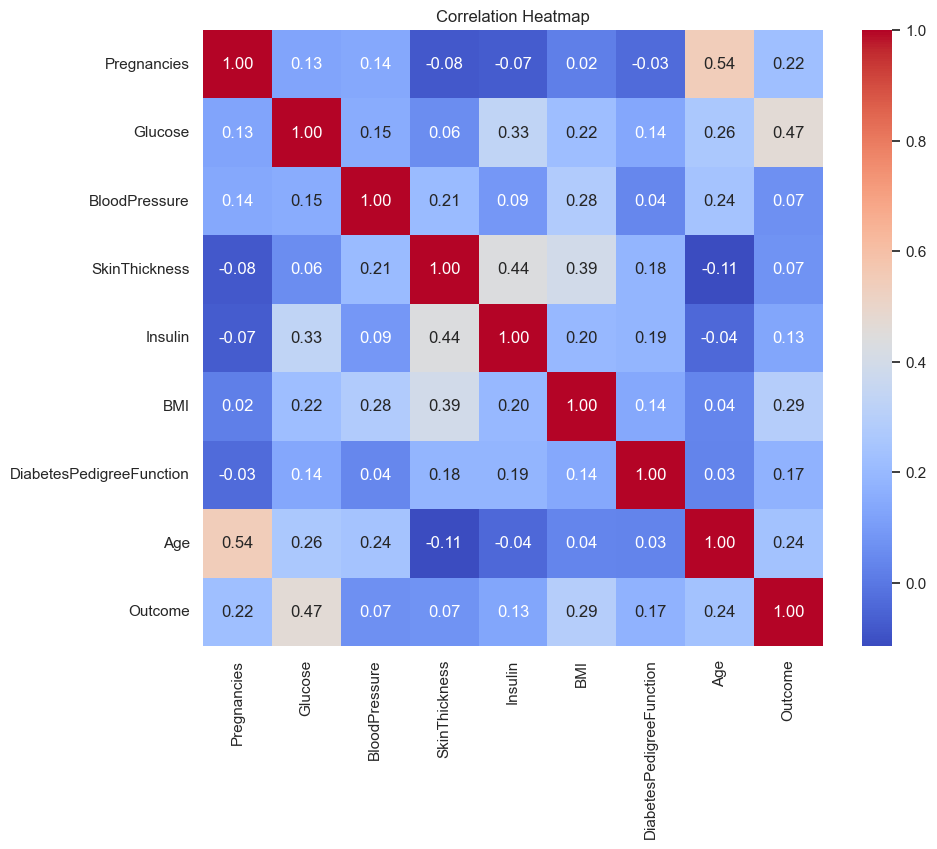

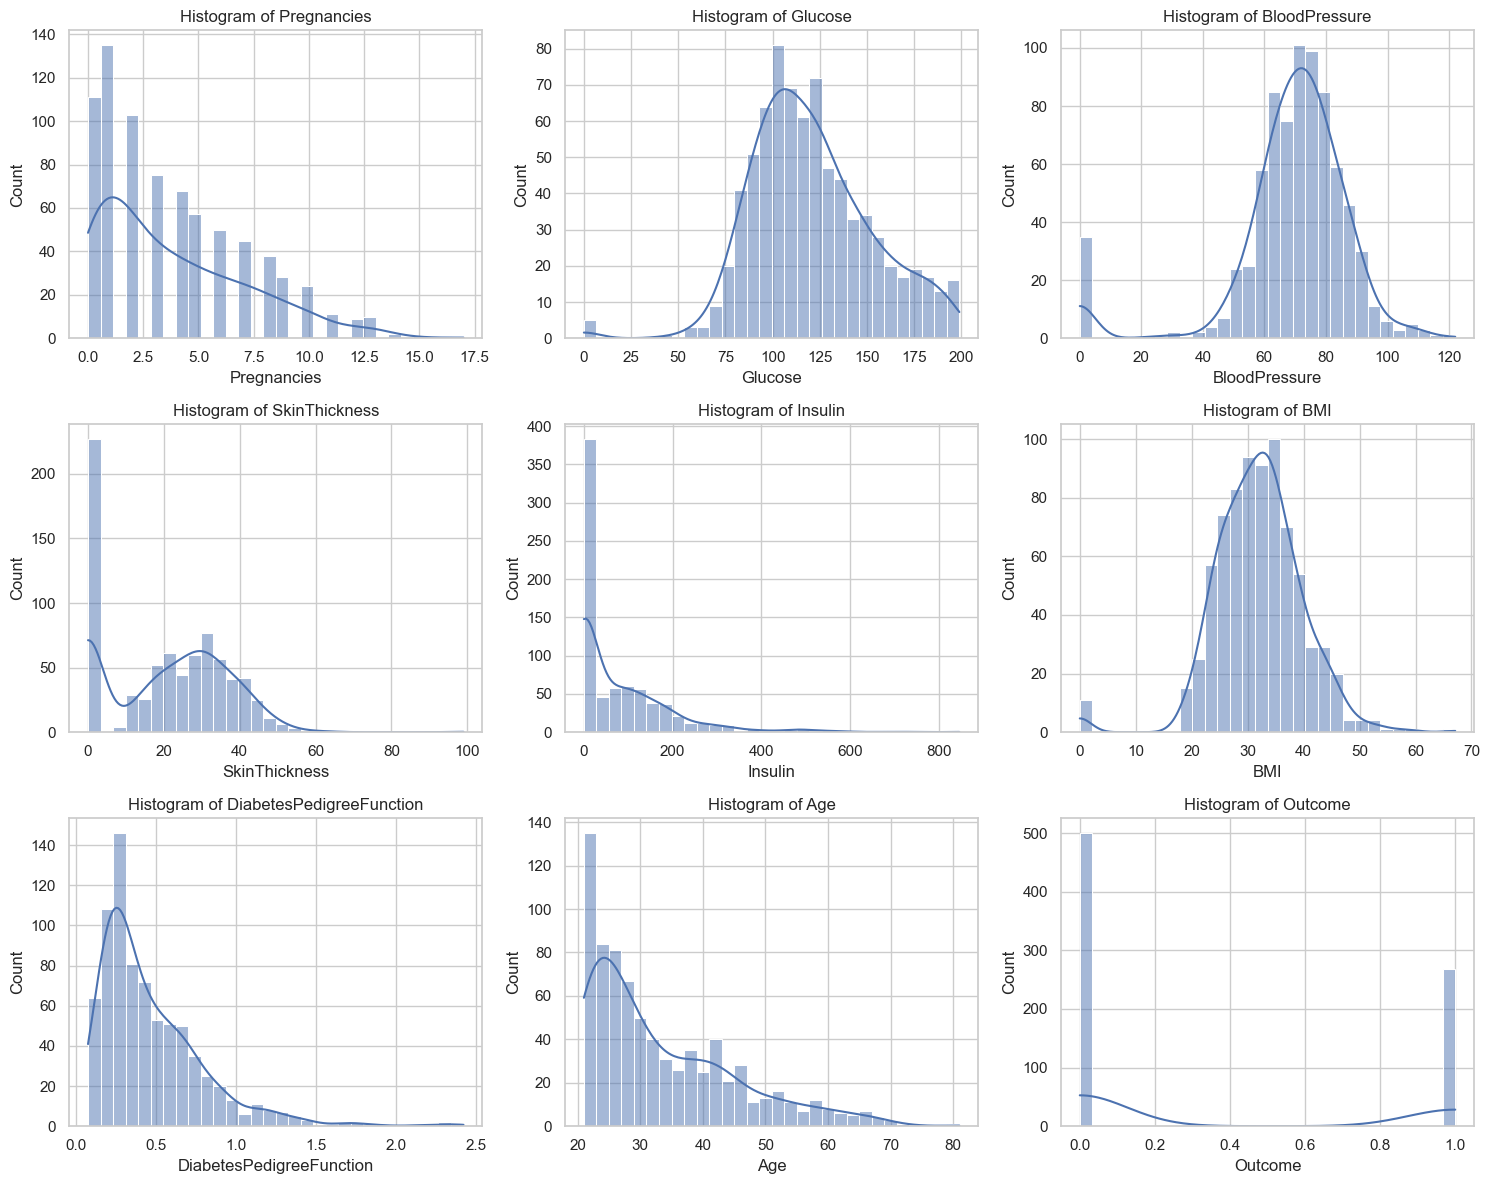

In [8]:
# Create a Graph object with the DataFrame
# This class is assumed to handle various data visualization tasks
graph = Graph(df)

# Univariate plots (analyzing one variable at a time)

# Plot histogram of the "Age" column to show distribution of ages
graph.plot_histogram("Age")

# Plot boxplot of the "BMI" column to visualize spread and outliers
graph.plot_boxplot("BMI")

# Plot countplot for the "Outcome" column to show frequency of each category
graph.plot_countplot("Outcome")

# Plot KDE (Kernel Density Estimate) for "Glucose" to visualize distribution shape
graph.plot_kde("Glucose")

# Bivariate plots (analyzing relationship between two variables)

# Scatter plot of "Age" vs "Glucose", color-coded by "Outcome" category
graph.plot_scatter("Age", "Glucose", hue="Outcome")

# Line plot showing trend of "BMI" over "Age"
graph.plot_line("Age", "BMI")

# Bar plot showing average "Pregnancies" for each "Outcome" category
graph.plot_bar("Outcome", "Pregnancies")

# Boxplot showing distribution of "Insulin" grouped by "Outcome"
graph.plot_boxplot_bivariate("Outcome", "Insulin")

# Heatmap showing correlation coefficients among numeric features
graph.plot_heatmap()

# Plot histograms for all numeric columns in the DataFrame
graph.plot_all_histograms()


In [9]:
# Assuming the dataset (df) is already loaded and preprocessed

# Create a DataSplitter object
# 'df' is the DataFrame, 'Outcome' is the target variable to predict
splitter = DataSplitter(df, target='Outcome')

# Split the dataset into training and testing sets
# Default test_size=0.2 (20% test data), random_state=42 for reproducibility
X_train, X_test, y_train, y_test = splitter.split()

# Initialize the SVM model with RBF kernel and regularization parameter C=1.0
svm = SVMModel(kernel='rbf', C=1.0)

# Train the SVM model using the training data
svm.train_model(X_train, y_train)

# Predict target values on the test set
y_pred = svm.predict(X_test)

# Evaluate model performance by comparing true and predicted labels
svm.evaluate(y_test, y_pred)

# Save the trained model and scaler to a file for later use
svm.save_model("svm_diabetes_model.pkl")


✅ Data split into train and test sets with test size = 0.2
Train shape: (614, 8), Test shape: (154, 8)
✅ Model training complete.
✅ Model Evaluation:
Confusion Matrix:
[[71 29]
 [14 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       100
           1       0.58      0.74      0.65        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154

Accuracy: 0.7208
✅ Model and scaler saved to 'svm_diabetes_model.pkl'
